# K-Means Clustering with Python

<p> <blockquote>K-Means clustering is the most popular unsupervised machine learning algorithm. K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them. I have used <span style="color:red">Facebook Live Sellers in Thailand dataset</span> for this project. I implement K-Means clustering to find intrinsic groups within this dataset that display the same <span style="color:blue">status_type</span> behaviour. The <span style="color:blue">status_type</span> behaviour variable consists of posts of a different nature (video, photos, statuses and links)</p>


# Table of Content :

<ul>
    <li>introduction to K-Means Clustering</li>
    <li>K-Means Clustering intuition</li>
    <li>Choosing the value of K</li>
    <li>The elbow method</li>
    <li>The problem statement</li>
    <li>Dataset description</li>
    <li>Import libraries</li>
    <li>Import dataset</li>
    <li>Exploratory data analysis</li>
    <li>Declare feature vector and target variable</li>
    <li>Convert categorical variable into integers</li>
    <li>Feature scaling</li>
    <li>K-Means model with two clusters</li>
    <li>K-Means model parameters study</li>
    <li>Check quality of weak classification by the model</li>
    <li>Use elbow method to find optimal number of clusters</li>
    <li>K-Means model with different clusters</li>
    <li>Results and conclusion</li>
    </ul>

# Introduction to K-Means Clustering :

<p> Machine learning algorithms can be broadly classified into two categories - supervised and unsupervised learning. There are other categories also like semi-supervised learning and reinforcement learning. But, most of the algorithms are classified as supervised or unsupervised learning. The difference between them happens because of presence of target variable. In unsupervised learning, there is no target variable. The dataset only has input variables which describe the data. This is called unsupervised learning.</p> <br>
<p><b>K-Means clustering</b> is the most popular unsupervised learning algorithm. It is used when we have unlabelled data which is data without defined categories or groups. The algorithm follows an easy or simple way to classify a given data set through a certain number of clusters, fixed apriori. K-Means algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.</p>

# K-Means Clustering intuition :

<p>K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them. It is based on centroid-based clustering.</p><br>
<p><b>Centroid</b> - A centroid is a data point at the centre of a cluster. In centroid-based clustering, clusters are represented by a centroid. It is an iterative algorithm in which the notion of similarity is derived by how close a data point is to the centroid of the cluster. K-Means clustering works as follows:- The K-Means clustering algorithm uses an iterative procedure to deliver a final result. The algorithm requires number of clusters K and the data set as input. The data set is a collection of features for each data point. The algorithm starts with initial estimates for the K centroids. The algorithm then iterates between two steps:-</p><br>
<p><b><em>1. Data assignment step : </em></b></p>
<p>Each centroid defines one of the clusters. In this step, each data point is assigned to its nearest centroid, which is based on the squared Euclidean distance. So, if ci is the collection of centroids in set C, then each data point is assigned to a cluster based on minimum Euclidean distance.</p>
<p><b><em>2. Centroid update step : </em></b></p>
<p>In this step, the centroids are recomputed and updated. This is done by taking the mean of all data points assigned to that centroid’s cluster.</p><br>
<p>The algorithm then iterates between step 1 and step 2 until a stopping criteria is met. Stopping criteria means no data points change the clusters, the sum of the distances is minimized or some maximum number of iterations is reached. This algorithm is guaranteed to converge to a result. The result may be a local optimum meaning that assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.</p>

# Choosing the value of K :

<p>The K-Means algorithm depends upon finding the number of clusters and data labels for a pre-defined value of K. To find the number of clusters in the data, we need to run the K-Means clustering algorithm for different values of K and compare the results. So, the performance of K-Means algorithm depends upon the value of K. We should choose the optimal value of K that gives us best performance. There are different techniques available to find the optimal value of K. The most common technique is the elbow method which is described below.</p>

# The elbow method :

<p>The elbow method is used to determine the optimal number of clusters in K-means clustering. The elbow method plots the value of the cost function produced by different values of K.</p><br>
<p>If K increases, average distortion will decrease. Then each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as K increases. The value of K at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.</p>

# The problem statement :


<p>In this project, I implement K-Means clustering with Python and Scikit-Learn. As mentioned earlier, K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them. I have used <span style="color:red">Facebook Live Sellers in Thailand dataset</span> for this project. I implement K-Means clustering to find intrinsic groups within this dataset that display the same <span style="color:blue">status_type</span> behaviour. The <span style="color:blue">status_type</span> behaviour variable consists of posts of a different nature (video, photos, statuses and links).</p>

# Dataset Description :

<p>6. Dataset description
In this project, I have used Facebook Live Sellers in Thailand Dataset, downloaded from the UCI Machine Learning repository. The dataset can be found at the following url-</p><br>
<a href="https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand">Dataset</a>

# Importing Libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ignoring warnings

import warnings
warnings.filterwarnings("ignore")

# Importing Dataset :


In [3]:
data = pd.read_csv(r"C:\Users\PRIYAM\Documents\Jupyter\K-Means_clustering_Project\Live_20210128.csv")

# Exploratory Data Analysis :

In [4]:
data.shape

(7050, 16)

<p>We can see that there are 7050 instances and 16 attributes in the dataset. In the dataset description, it is given that there are 7051 instances and 12 attributes in the dataset.</p><br>
<p>So, we can infer that the first instance is the row header and there are 4 extra attributes in the dataset. Next, we should take a look at the dataset to gain more insight about it.</p>

In [5]:
# First 10 rows of the data
data.head(10)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
5,6,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0,NaN,NaN,NaN,NaN
6,7,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3,NaN,NaN,NaN,NaN
7,8,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1,NaN,NaN,NaN,NaN
8,9,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0,NaN,NaN,NaN,NaN
9,10,photo,4/11/2018 4:53,170,9,1,167,3,0,0,0,0,NaN,NaN,NaN,NaN


In [6]:
# To know the basic information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

<h3>Checking for missing values :</h3>

In [7]:
data.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

We can see that there are 4 redundant columns in the dataset. We should drop them before proceeding further.

In [8]:
# Dropping the redudant columns
data.drop(['Column1','Column2','Column3','Column4'],axis = 1,inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


In [10]:
data.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


There are 2 catagorical variables in the dataset and i will exlore them one by one.

In [11]:
len(data['status_id'].unique())

7050

<h3>Exploring status_published variable</h3>

In [12]:
len(data['status_published'].unique())

6913

We can see that there are 6913 unique labels in the status_published variable. The total number of instances in the dataset is 7050. So, it is also a approximately a unique identifier for each of the instances. Thus this is not a variable that we can use. Hence, I will drop it.

<h3>Exploring status_type variable</h3>

In [13]:
len(data['status_type'].unique())

4

In [14]:
data['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

We can see that there are 4 categories of labels in the status_type variable.

In [15]:
# Drop the status_published variable from dataset

data.drop(['status_published'],axis=1,inplace=True)

<h2>View summary again : </h2>

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_id      7050 non-null   int64 
 1   status_type    7050 non-null   object
 2   num_reactions  7050 non-null   int64 
 3   num_comments   7050 non-null   int64 
 4   num_shares     7050 non-null   int64 
 5   num_likes      7050 non-null   int64 
 6   num_loves      7050 non-null   int64 
 7   num_wows       7050 non-null   int64 
 8   num_hahas      7050 non-null   int64 
 9   num_sads       7050 non-null   int64 
 10  num_angrys     7050 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 606.0+ KB


In [17]:
data.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,529,512,262,432,92,3,1,1,0
1,2,photo,150,0,0,150,0,0,0,0,0
2,3,video,227,236,57,204,21,1,1,0,0
3,4,photo,111,0,0,111,0,0,0,0,0
4,5,photo,213,0,0,204,9,0,0,0,0


We can see that there is 1 non-numeric column status_type in the dataset. I will convert it into integer equivalents.

# Declare feature vector and target variable :


In [18]:
X = data
y = data['status_type']

# Convert categorical variable into integer : 

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['status_type'] = le.fit_transform(X['status_type'])

y = le.transform(y)

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_id      7050 non-null   int64
 1   status_type    7050 non-null   int32
 2   num_reactions  7050 non-null   int64
 3   num_comments   7050 non-null   int64
 4   num_shares     7050 non-null   int64
 5   num_likes      7050 non-null   int64
 6   num_loves      7050 non-null   int64
 7   num_wows       7050 non-null   int64
 8   num_hahas      7050 non-null   int64
 9   num_sads       7050 non-null   int64
 10  num_angrys     7050 non-null   int64
dtypes: int32(1), int64(10)
memory usage: 578.4 KB


In [21]:
X.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,3,529,512,262,432,92,3,1,1,0
1,2,1,150,0,0,150,0,0,0,0,0
2,3,3,227,236,57,204,21,1,1,0,0
3,4,1,111,0,0,111,0,0,0,0,0
4,5,1,213,0,0,204,9,0,0,0,0


# Feature Scaling :


In [22]:
col = X.columns

In [23]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [24]:
X = pd.DataFrame(X,columns=[col])

In [25]:
X.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.000000,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.000142,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000284,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.000426,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000567,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


# K-Means with 2 clusters :

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [27]:
kmeans.cluster_centers_

array([[4.54626777e-01, 3.40500998e-01, 4.30301772e-02, 7.66608414e-04,
        7.70054301e-04, 4.25111817e-02, 2.15708127e-03, 2.36751410e-03,
        1.17194063e-03, 2.72101747e-03, 1.40159181e-03],
       [5.80613866e-01, 9.73086517e-01, 5.92098298e-02, 2.83171472e-02,
        3.10880406e-02, 5.12453287e-02, 4.99627426e-02, 8.67191241e-03,
        1.02352348e-02, 8.43314876e-03, 7.64842648e-03]])

<ul>
    <li><p><b>Inertia</b> measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ).</p></li>
    <li>The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. The means are commonly called the cluster <b>centroids</b>.</li>
    <li>The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.</li></ul>

In [28]:
kmeans.inertia_

803.6306836734716

<ul>
    <li>The lesser the Inertia the better the model fits.</li>
    <li>We can see the model has very high inertia value.So this is not a good fit to the data.</li>
    </ul>

# Check quality of weak classification by the model :

In [30]:
labels = kmeans.labels_
labels

array([1, 0, 1, ..., 0, 0, 0])

In [33]:
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 63 out of 7050 samples were correctly labeled.
Accuracy score: 0.01


We have achieved a weak cluster accuracy.


# Using Elbow method to find optimal number of clusters :

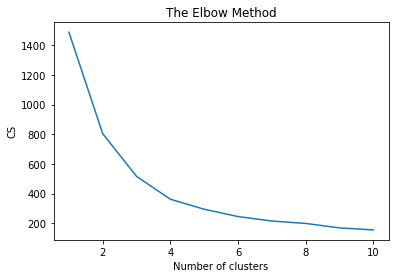

In [35]:
from sklearn.cluster import KMeans
cs=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,
                   init="k-means++",
                   max_iter=300,
                   n_init=10,
                   random_state=0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
    
plt.plot(range(1,11),cs)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")
plt.show()

<p>By the above plot, we can see that there is a kink at 2.But we got weal accuracy at 2.</p>
<p>After 3 the curve is quite balance-paced unlike in other points so, i will take 3 and write the code to see accuracy.</p>

In [58]:
/from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3,random_state=0)

kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [59]:
labels = kmeans.labels_
correct_labels = sum(y==labels)
print("Result : %d out of %d samples were correctly labeled." %(correct_labels,len(labels)))
print("Accuracy : {}".format(correct_labels/len(labels)))

Result : 3055 out of 7050 samples were correctly labeled.
Accuracy : 0.43333333333333335


<h4>We have achieved a relatively high accuracy with k=3.</h4>

# Result and Conclusion :

<ol>
    <li>In this project, I have implemented the most popular unsupervised clustering technique called K-Means Clustering.</li>
    <li>I have applied the elbow method and find that k=2 (k is number of clusters) can be considered a good number of cluster to cluster this data.</li>
    <li>I have find that the model has very high inertia of 803.6306836734716. So, this is not a good model fit to the data.</li>
    <li>I have achieved a weak classification accuracy of 1% with k=2 by our unsupervised model.</li>
    <li>So, I have changed the value of k and find relatively higher classification accuracy of 44% with k=3.</li>
    <li>Hence, we can conclude that k=4 being the optimal number of clusters.</li>
    </ol>


    